In [1]:
#Car Price Predictive System

In [2]:
#importing Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
#Data Collection and Processing

dataset = pd.read_csv("car data.csv")

In [5]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
dataset.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1

In [8]:
dataset['Owner'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Owner, Length: 301, dtype: int64>

In [9]:
dataset.shape

(301, 9)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG': 2}, 'Seller_Type': {'Dealer': 0, 'Individual' : 1} , 'Transmission' : {'Manual': 0, 'Automatic': 1}}, inplace = True)

In [16]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [17]:
#Splitting the data into training and testing

In [18]:
X= dataset.drop(['Car_Name', 'Selling_Price'], axis =1)

In [19]:
Y = dataset['Selling_Price']

In [20]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [21]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


In [24]:
#Model Training

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, Y_train)

LinearRegression()

In [28]:
#Model Evaluation

train_pred = model.predict(X_train)
error = metrics.r2_score(train_pred, Y_train)
print("Error :", error)

Error : 0.863565550919901


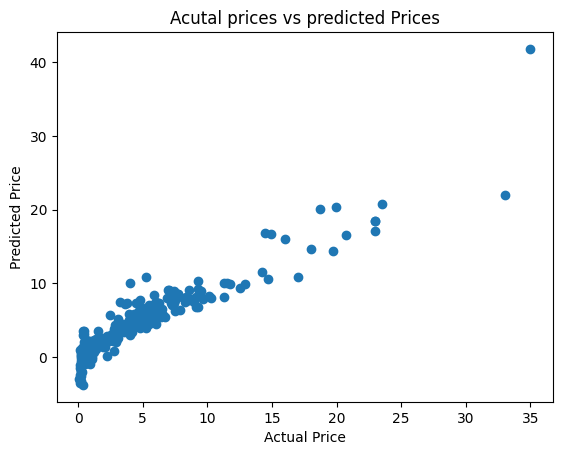

In [29]:
#Visualize the actual and Predicted prices

plt.scatter(Y_train, train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Acutal prices vs predicted Prices")
plt.show()

In [30]:
#Model Evaluation

test_pred = model.predict(X_test)
test_error = metrics.r2_score(test_pred, Y_test)
print("Error :", test_error)

Error : 0.8062199941174848


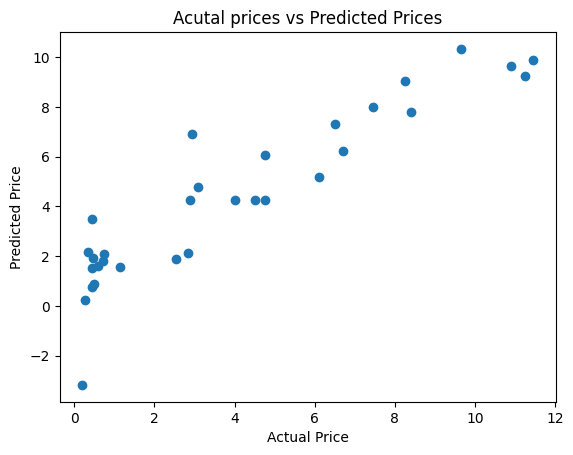

In [31]:

plt.scatter(Y_test, test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Acutal prices vs Predicted Prices")
plt.show()

In [32]:
lasso_model = Lasso()
lasso_model.fit(X_train,Y_train)

Lasso()

In [33]:

train_pred = lasso_model.predict(X_train)
error = metrics.r2_score(train_pred, Y_train)
print("Error :", error)

Error : 0.7984590240704255


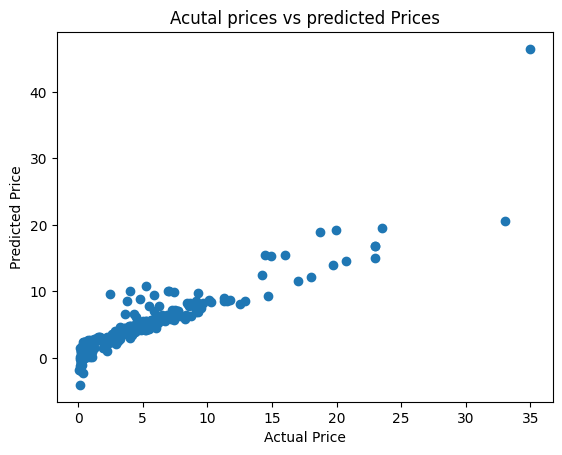

In [36]:
plt.scatter(Y_train, train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Acutal prices vs predicted Prices")
plt.show()

In [34]:

test_pred = lasso_model.predict(X_test)
test_error = metrics.r2_score(test_pred, Y_test)
print("Error :", test_error)

Error : 0.7711110403265509


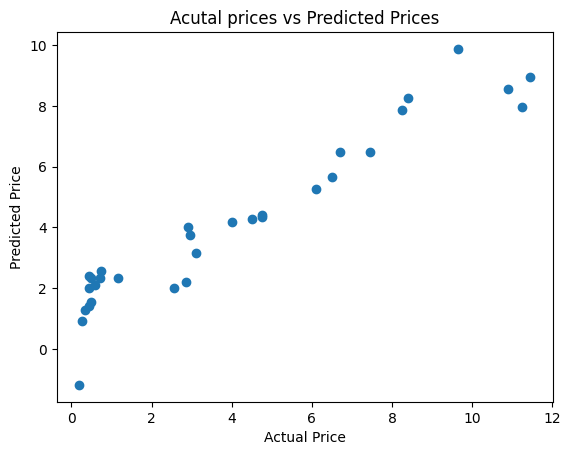

In [35]:
plt.scatter(Y_test, test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Acutal prices vs Predicted Prices")
plt.show()